<a href="https://colab.research.google.com/github/ThalitaCoelhoAguiar/meus-notebooks-colab/blob/main/DESAFIO_Classifica%C3%A7%C3%A3o_de_Renda_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Treinamento CIS - 1º Período (Classificação)

### Importação de Bibliotecas

In [93]:
from google.colab import files
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import pearsonr
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from matplotlib import pyplot as plt

### Importação do Dataset

Conjunto de dados

O conjunto de dados “Adult” (Census Income) reúne informações do censo dos EUA
de 1994, com 48.842 registros e 14 atributos demográficos e socioeconômicos em que o output é a renda anual de um indivíduo excede US$ 50.000.


In [94]:
uploaded = files.upload()  # Selecione o CSV baixado
df = pd.read_csv(next(iter(uploaded)), sep=',')
df

Saving adult.csv to adult (2).csv


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [97]:
print(df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')


### Tratamento de dados para classificação

In [98]:
# Variáveis preditores
X = df.drop(['income'], axis=1)

# Definindo alvo como booleano (True/False)
y = df['income'].apply(lambda x: x == '>50K')

# One-hot encoding nas colunas categóricas
X_encoded = pd.get_dummies(X)

print(X_encoded.head())

   age  fnlwgt  education.num  capital.gain  capital.loss  hours.per.week  \
0   90   77053              9             0          4356              40   
1   82  132870              9             0          4356              18   
2   66  186061             10             0          4356              40   
3   54  140359              4             0          3900              40   
4   41  264663             10             0          3900              40   

   workclass_?  workclass_Federal-gov  workclass_Local-gov  \
0         True                  False                False   
1        False                  False                False   
2         True                  False                False   
3        False                  False                False   
4        False                  False                False   

   workclass_Never-worked  ...  native.country_Portugal  \
0                   False  ...                    False   
1                   False  ...                

#Árvore de Decisão


é um algoritmo de aprendizado de máquina supervisionado que cria uma estrutura de decisões em forma de árvore para prever resultados categóricos (classes). O modelo retorna uma classe (ex.: 0, 1, 'sim', 'não', etc.).

In [99]:
modelo = DecisionTreeClassifier(max_depth=5, random_state=0)
modelo.fit(X_encoded, y)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [100]:
y_pred=modelo.predict(X_encoded) # previsões do modelo

print(y_pred)

[ True False False ... False False False]


### Avaliar acurácia *do* modelo

In [101]:
# Comparar previsões com o real
acuracia = accuracy_score(y, y_pred)
print(f'Acurácia: {acuracia:.2f}')

Acurácia: 0.85


In [102]:
# Calcular Precisão
precisão = precision_score(y, y_pred)
print(f'Precisão: {precisão:.2f}')

Precisão: 0.78


In [103]:
# Calcular o F1 score
f1 = f1_score(y, y_pred)
print(f'F1: {f1:.2f}')

F1: 0.63


In [104]:
# Calcular o recall
recall = recall_score(y, y_pred)

# O recall será um valor entre 0 e 1:
print(f'Recall: {recall:.2f}')

Recall: 0.53


a precisão é a razão entre o número de verdadeiros positivos e o número total de previsões positivas feitas pelo modelo (verdadeiros positivos e falsos positivos).

O recall é o número de pessoas que o modelo identificou corretamente  dividido pelo número total de pessoas.

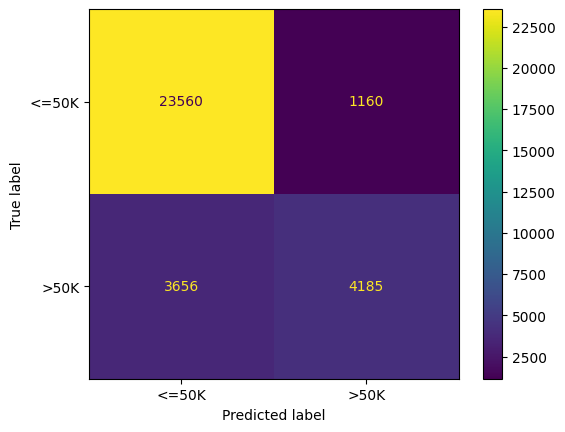

In [105]:
# 3. Calcular e exibir a matriz de confusão
cm = confusion_matrix(y, y_pred)

# 4. Exibir de forma gráfica
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['<=50K', '>50K'])
disp.plot()

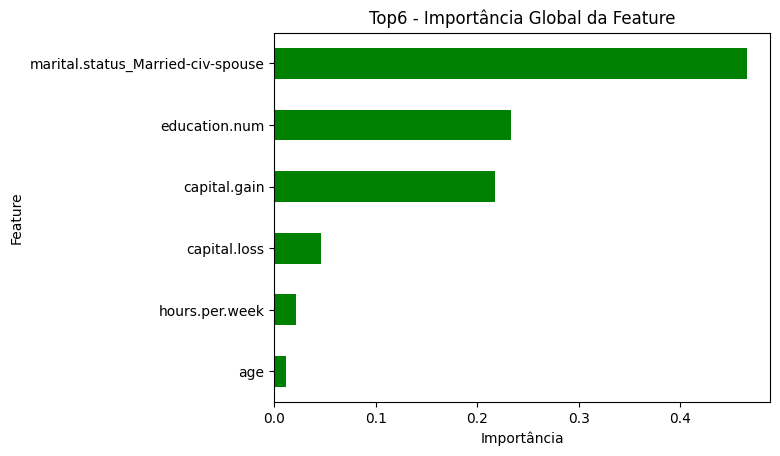

In [120]:
# Mostrar as 20 feature mais importantes
global_importance= pd.Series(modelo.feature_importances_, index=X_encoded.columns) # Get feature importances from the model
top_features = global_importance.sort_values(ascending=False).head(6)
top_features.sort_values(ascending=True).plot.barh(color='green')
plt.xlabel("Importância")
plt.ylabel("Feature")
plt.title("Top6 - Importância Global da Feature")
plt.show()

# Random Forest

Os modelos baseados em árvores são muito mais robustos em relação a outliers do que os modelos lineares, e não precisam que as variáveis sejam normalizadas para funcionar. orque o modelo usa aleatoriedade ao selecionar amostras e variáveis para cada árvore, tornando o modelo mais robusto e menos propenso a overfitting.

em que nota-se que a naioria doas valores o modelo acertou(23560)  e de forma bem superior o de casos de de (<=50K).

In [106]:
modeloRF = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
modeloRF.fit(X_encoded, y)

RandomForestClassifier(max_depth=5, random_state=0)

In [107]:
y_pred=modeloRF.predict(X_encoded) # previsões do modelo

print(y_pred)

[False False False ... False False False]


### Avaliar acurácia *do* modelo

In [108]:
# Comparar previsões com o real
acuracia = accuracy_score(y, y_pred)
print(f'Acurácia: {acuracia:.2f}')

Acurácia: 0.84


In [109]:
# Calcular Precisão
precisão = precision_score(y, y_pred)
print(f'Precisão: {precisão:.2f}')

Precisão: 0.84


In [110]:
# Calcular o F1 score
f1 = f1_score(y, y_pred)
print(f'F1: {f1:.2f}')

F1: 0.55


In [111]:
# Calcular o recall
recall = recall_score(y, y_pred)

# O recall será um valor entre 0 e 1:
print(f'Recall: {recall:.2f}')

Recall: 0.41


a precisão é a razão entre o número de verdadeiros positivos e o número total de previsões positivas feitas pelo modelo (verdadeiros positivos e falsos positivos).

O recall é o número de pessoas que o modelo identificou corretamente  dividido pelo número total de pessoas.

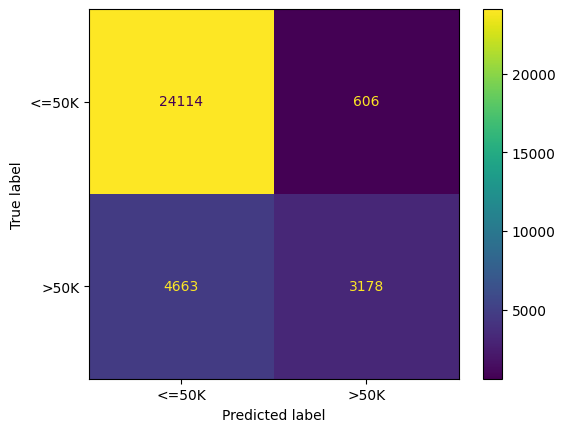

In [112]:
# 3. Calcular e exibir a matriz de confusão
cm = confusion_matrix(y, y_pred)

# 4. Exibir de forma gráfica
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['<=50K', '>50K'])
disp.plot()

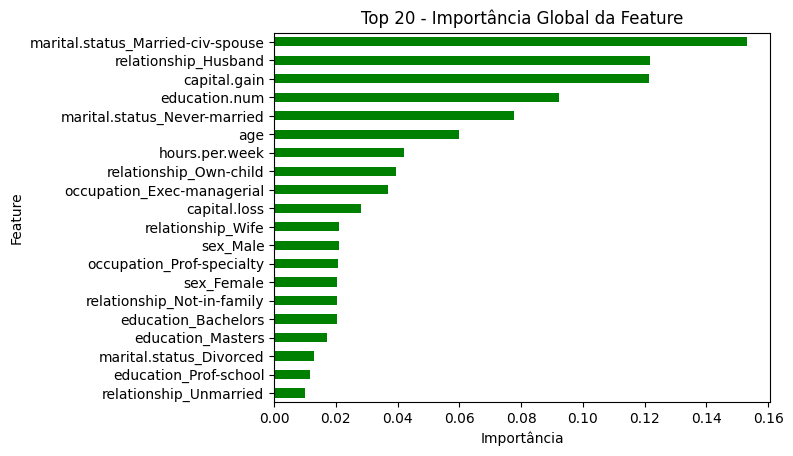

In [117]:
# Mostrar as 20 feature mais importantes
global_importance= pd.Series(modeloRF.feature_importances_, index=X_encoded.columns) # Get feature importances from the model
top_features = global_importance.sort_values(ascending=False).head(20)
top_features.sort_values(ascending=True).plot.barh(color='green')
plt.xlabel("Importância")
plt.ylabel("Feature")
plt.title("Top 20 - Importância Global da Feature")
plt.show()
